# Diabetes

### Diabetes is a disease that occurs when your blood glucose, also called blood sugar, is too high. Blood glucose is your main source of energy and comes from the food you eat. Insulin, a hormone made by the pancreas, helps glucose from food get into your cells to be used for energy. Sometimes your body doesn’t make enough—or any—insulin or doesn’t use insulin well. Glucose then stays in your blood and doesn’t reach your cells.Over time, having too much glucose in your blood can cause health problems. Although diabetes has no cure, you can take steps to manage your diabetes and stay healthy.

In [1]:
## import the necessary libraries 
import numpy as np 
import pandas as pd 
from matplotlib import pyplot as plt 
import seaborn as sns
sns.set()

In [2]:
## loaad in the data 
data = pd.read_csv("datasets_23663_30246_diabetes.csv")

In [3]:
## check the data
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0


In [4]:
## check the info of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
Pregnancies                 2000 non-null int64
Glucose                     2000 non-null int64
BloodPressure               2000 non-null int64
SkinThickness               2000 non-null int64
Insulin                     2000 non-null int64
BMI                         2000 non-null float64
DiabetesPedigreeFunction    2000 non-null float64
Age                         2000 non-null int64
Outcome                     2000 non-null int64
dtypes: float64(2), int64(7)
memory usage: 140.8 KB


In [6]:
## check for missing values 
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [7]:
## check the columns 
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [9]:
## chek the shape of the data
data.shape

(2000, 9)

In [11]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,3.703500,121.182500,69.145500,20.935000,80.254000,32.193000,0.470930,33.090500,0.342000
std,3.306063,32.068636,19.188315,16.103243,111.180534,8.149901,0.323553,11.786423,0.474498
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,63.500000,0.000000,0.000000,27.375000,0.244000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,40.000000,32.300000,0.376000,29.000000,0.000000
75%,6.000000,141.000000,80.000000,32.000000,130.000000,36.800000,0.624000,40.000000,1.000000
max,17.000000,199.000000,122.000000,110.000000,744.000000,80.600000,2.420000,81.000000,1.000000


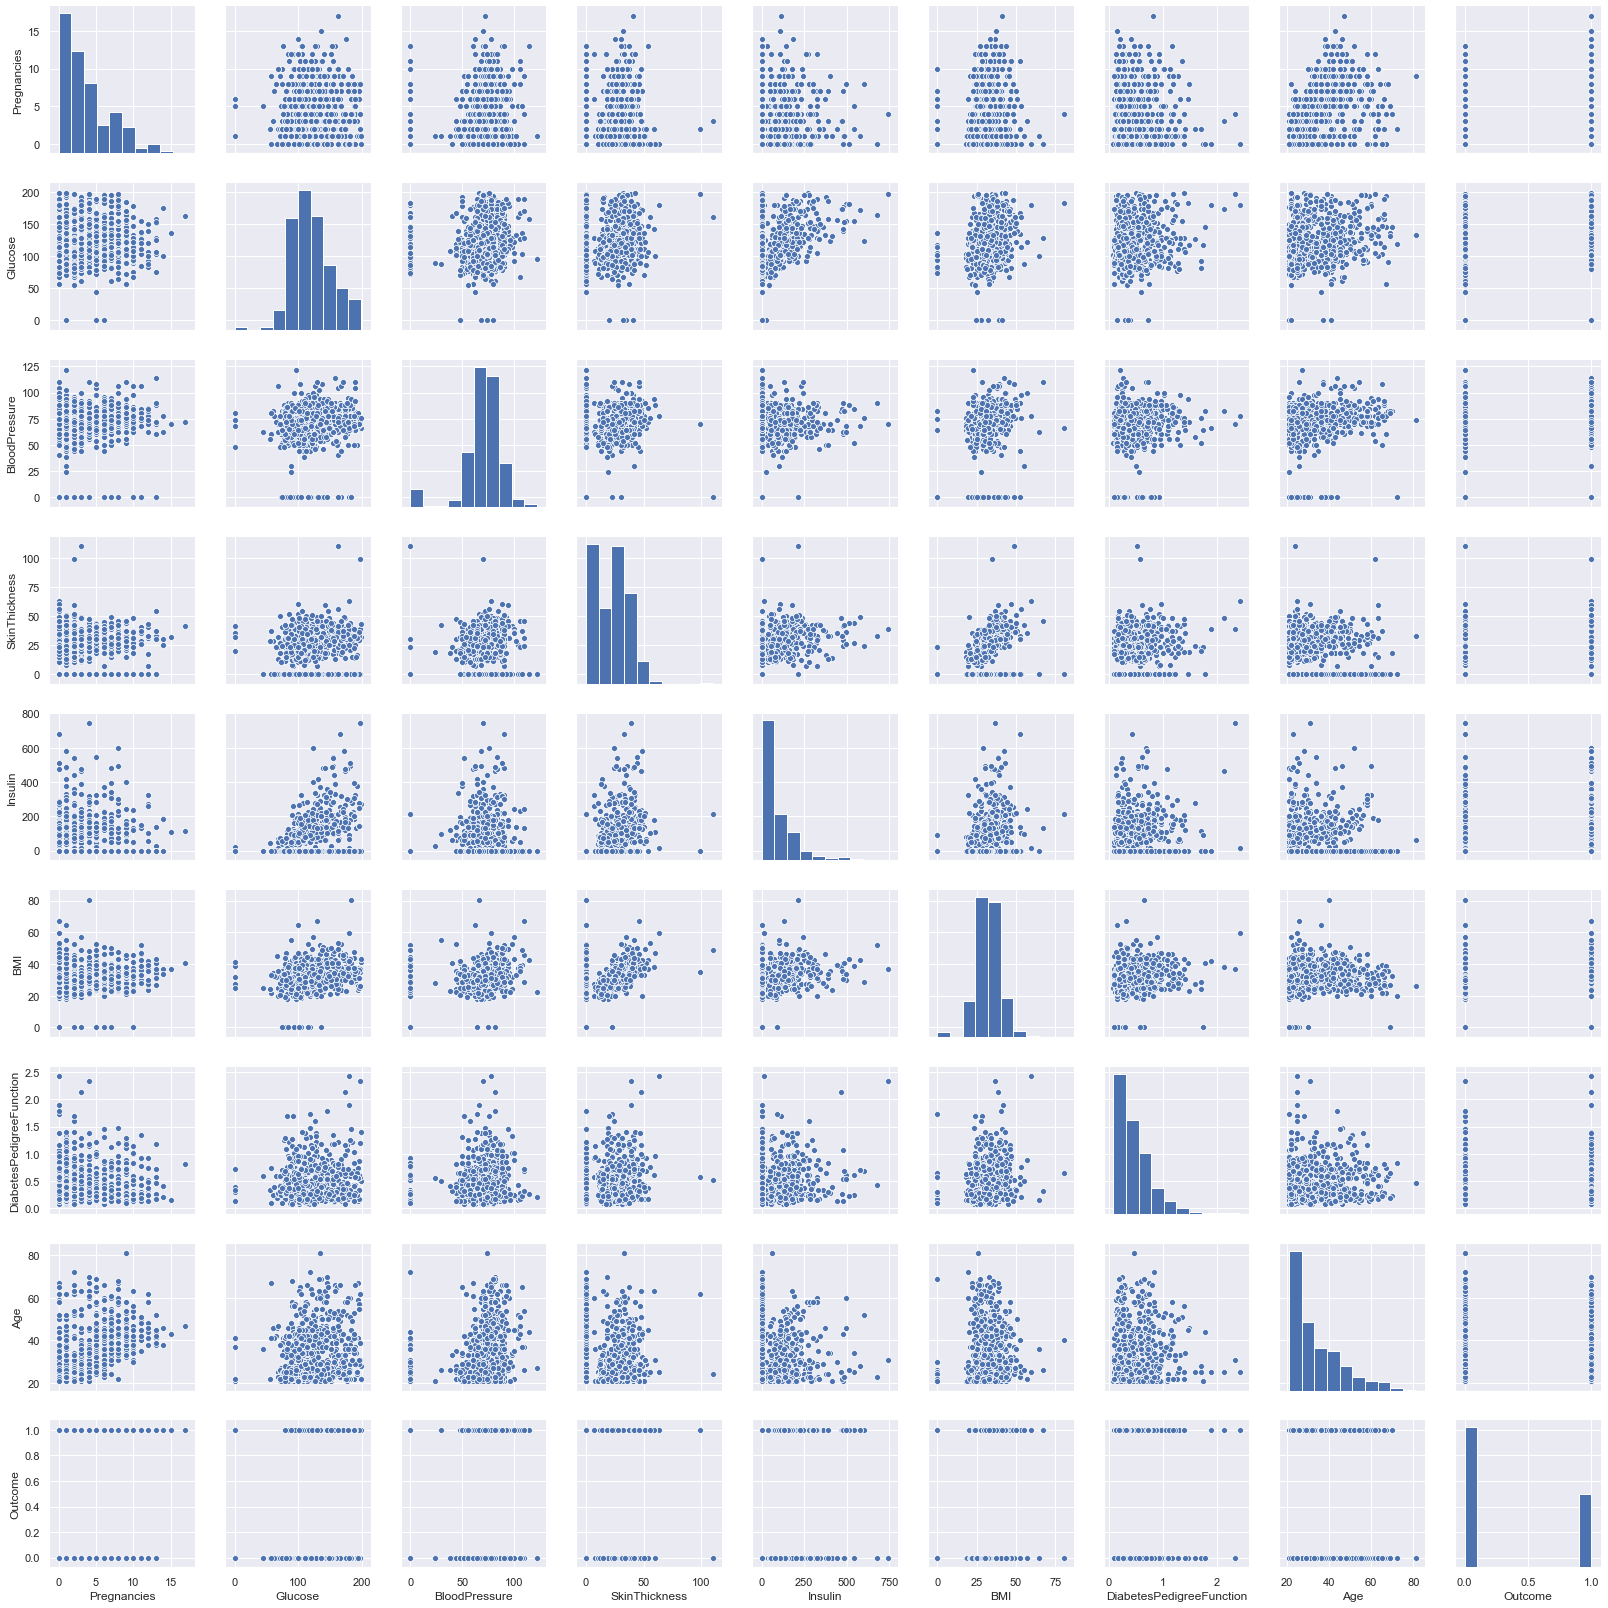

In [12]:
## check the relationships among the dataset 
sns.pairplot(data)

In [13]:
## correlation 
data.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.120405,0.149672,-0.063375,-0.076600,0.019475,-0.025453,0.539457,0.224437
Glucose,0.120405,1.000000,0.138044,0.062368,0.320371,0.226864,0.123243,0.254496,0.458421
BloodPressure,0.149672,0.138044,1.000000,0.198800,0.087384,0.281545,0.051331,0.238375,0.075958
SkinThickness,-0.063375,0.062368,0.198800,1.000000,0.448859,0.393760,0.178299,-0.111034,0.076040
Insulin,-0.076600,0.320371,0.087384,0.448859,1.000000,0.223012,0.192719,-0.085879,0.120924
BMI,0.019475,0.226864,0.281545,0.393760,0.223012,1.000000,0.125719,0.038987,0.276726
DiabetesPedigreeFunction,-0.025453,0.123243,0.051331,0.178299,0.192719,0.125719,1.000000,0.026569,0.155459
Age,0.539457,0.254496,0.238375,-0.111034,-0.085879,0.038987,0.026569,1.000000,0.236509
Outcome,0.224437,0.458421,0.075958,0.076040,0.120924,0.276726,0.155459,0.236509,1.000000


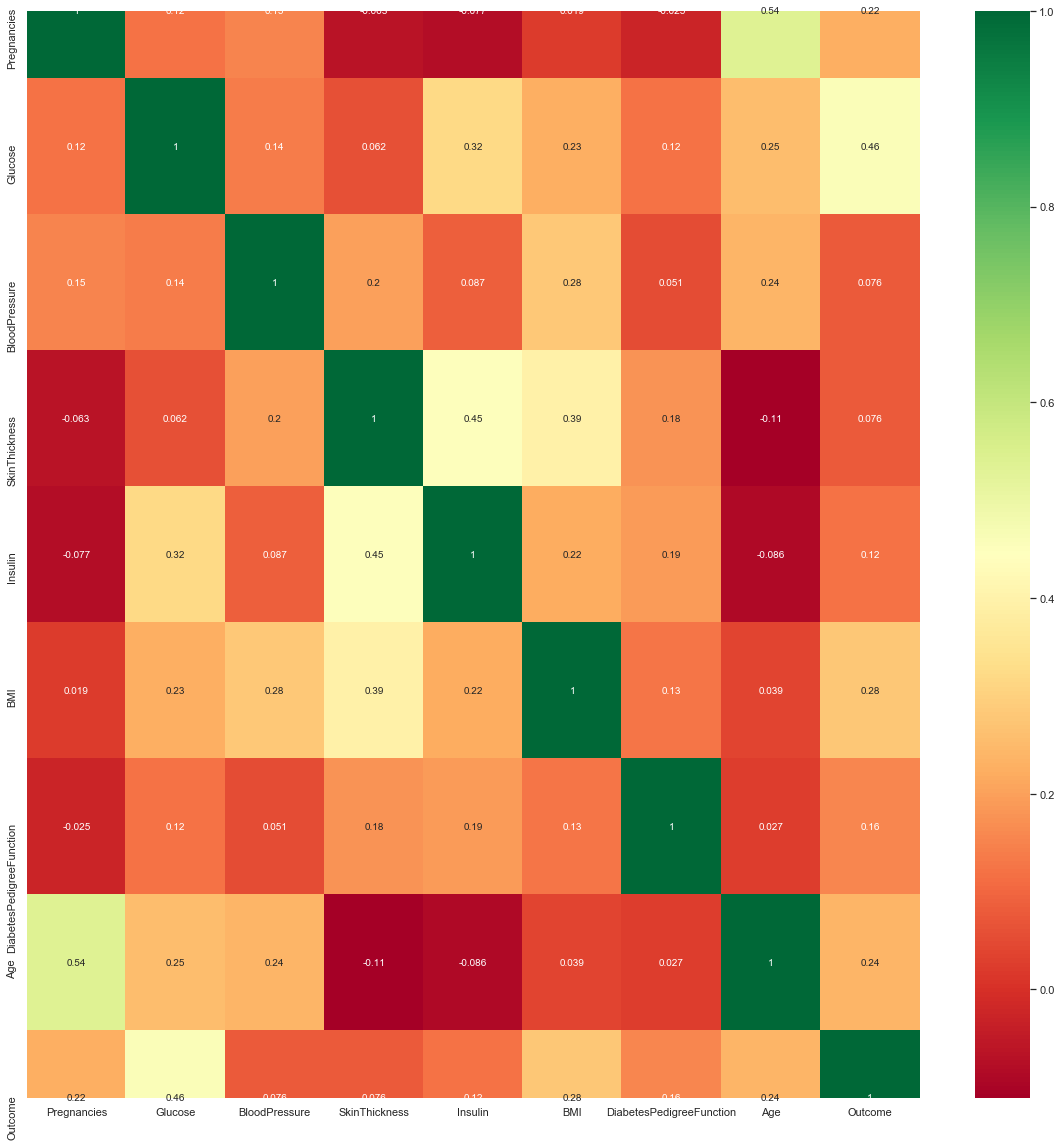

In [15]:
## plot the heatmat to see the correlation
plt.figure(figsize=(20,20))
sns.heatmap(data.corr(), annot=True, cmap="RdYlGn")

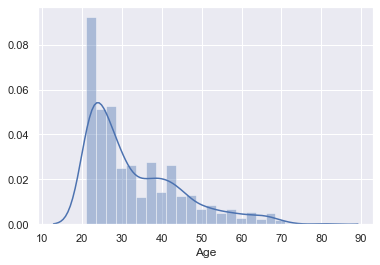

In [16]:
sns.distplot(data["Age"])

# Data Cleaning 

In [17]:
## we have to replace Zeros in ['Glucose','BloodPressure','SkinThickness','Insulin','BMI','Pregnancies'] with mean
data["Glucose"] = data["Glucose"].replace(0,data["Glucose"].mean())
data["BloodPressure"] = data["BloodPressure"].replace(0,data["BloodPressure"].mean())
data["SkinThickness"] = data["SkinThickness"].replace(0,data["SkinThickness"].mean())
data["Insulin"] = data["Insulin"].replace(0,data["Insulin"].mean())
data["BMI"] = data["BMI"].replace(0,data["BMI"].mean())
data["Pregnancies"] = data["Pregnancies"].replace(0,data["Pregnancies"].mean())

In [18]:
## check the descriptive analysis after filling missing values with the mean 
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,4.260877,121.970186,72.257047,26.932877,118.615412,32.643702,0.470930,33.090500,0.342000
std,2.924714,30.533180,11.968614,9.884003,88.366170,7.190337,0.323553,11.786423,0.474498
min,1.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,2.000000,99.000000,64.000000,20.935000,80.254000,27.600000,0.244000,24.000000,0.000000
50%,3.703500,118.000000,72.000000,23.000000,80.254000,32.300000,0.376000,29.000000,0.000000
75%,6.000000,141.000000,80.000000,32.000000,130.000000,36.800000,0.624000,40.000000,1.000000
max,17.000000,199.000000,122.000000,110.000000,744.000000,80.600000,2.420000,81.000000,1.000000


# Model Building 

In [20]:
## select the independent and dependent features 
X = data.drop(columns="Outcome") #you can also use this method - data = data.drop(["Outcome"], axis=1)
y = data["Outcome"]

In [21]:
## crosscheck 
y.head()

0    1
1    0
2    1
3    1
4    0
Name: Outcome, dtype: int64

In [22]:
## split the data into training and test set 
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [24]:
##check the shape of the trianing set 
X_train.shape

(1600, 8)

In [25]:
X_test.shape

(400, 8)

In [26]:
## Feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [27]:
## modelling and predicting 

from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)

y_prediction = random_forest.predict(X_test)

In [28]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test, y_prediction))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       272
           1       1.00      0.98      0.99       128

    accuracy                           0.99       400
   macro avg       1.00      0.99      0.99       400
weighted avg       1.00      0.99      0.99       400



In [29]:
## confusion matrix
cm = confusion_matrix(y_test, y_prediction)
cm

array([[272,   0],
       [  2, 126]], dtype=int64)

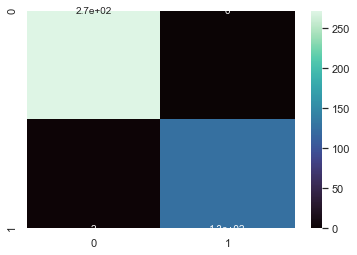

In [30]:
## plot confusion matrix 
sns.heatmap(cm, annot=True, cmap="mako")

In [32]:
## save the model in a pickle file 
import pickle 
pickle.dump(random_forest, open('model.pkl', 'wb'))

In [33]:
random_forest.predict([[2,2,3,4,5,6,7,8]])

array([0], dtype=int64)

# Thanks :)